In [1]:
#Import Necessary Libraries
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

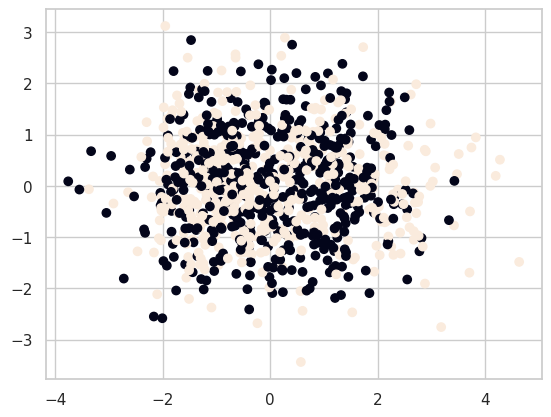

In [91]:
# Generate a binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=1)

#plot the dataset
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [92]:
# Initialize logistic regression model
model = LogisticRegression()

In [93]:
# Configure the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [94]:
# Evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores

array([0.87, 0.86, 0.8 , 0.84, 0.81, 0.9 , 0.84, 0.84, 0.81, 0.81, 0.81,
       0.83, 0.85, 0.87, 0.85, 0.81, 0.83, 0.85, 0.83, 0.85, 0.88, 0.91,
       0.89, 0.82, 0.77, 0.85, 0.84, 0.86, 0.82, 0.79])

In [95]:
# Report performance
print(f'Accuracy: {mean(scores):.3f} ({std(scores):.3f})')

Accuracy: 0.840 (0.032)


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


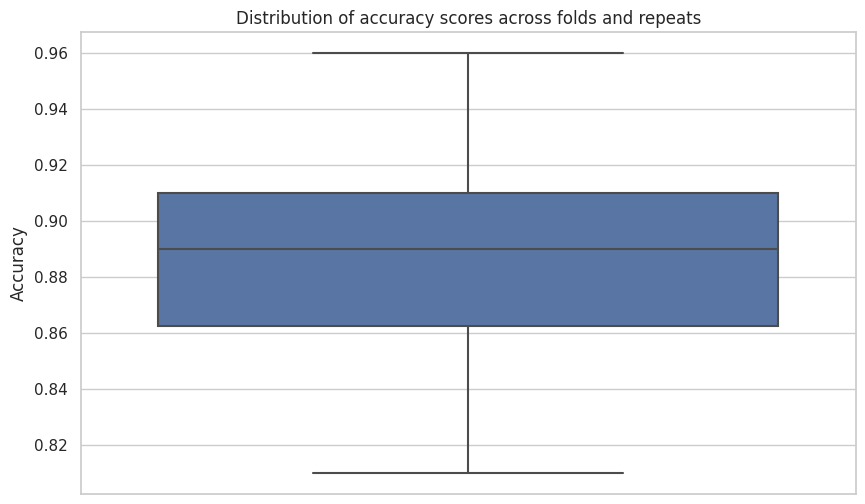

In [73]:
#visualize the output,
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))  # Set figure size
sns.boxplot(y=scores)  # Create boxplot
plt.title('Distribution of accuracy scores across folds and repeats')  # Set title
plt.ylabel('Accuracy')  # Set y-axis label
plt.show()  # Display the plot

To Improve the model below methods can be used

In [74]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [83]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
import numpy as np

# Set up the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['lbfgs', 'liblinear']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=cv, n_jobs=-1)

# Fit the model
grid_search.fit(X_scaled, y)

# Get the best parameters
best_params = grid_search.best_params_

In [84]:
#Evaluating Model with Best Parameters

# Initialize logistic regression model with best parameters
model_tuned = LogisticRegression(**best_params, max_iter=1000)

# Evaluate model
scores_tuned = cross_val_score(model_tuned, X_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)

# Report performance
print(f'Tuned Accuracy: {mean(scores_tuned):.3f} ({std(scores_tuned):.3f})')

Tuned Accuracy: 0.887 (0.036)


In [85]:
#Combine the Scores into a Pandas DataFrame
import pandas as pd

# Combine scores
data = {
    'Original Logistic Regression': scores,
    'Tuned Logistic Regression': scores_tuned,
}

# Create DataFrame
df_scores = pd.DataFrame(data)

In [86]:
#Melt the DataFrame for easier plotting
df_melted = df_scores.melt(var_name="Model", value_name="Accuracy")

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


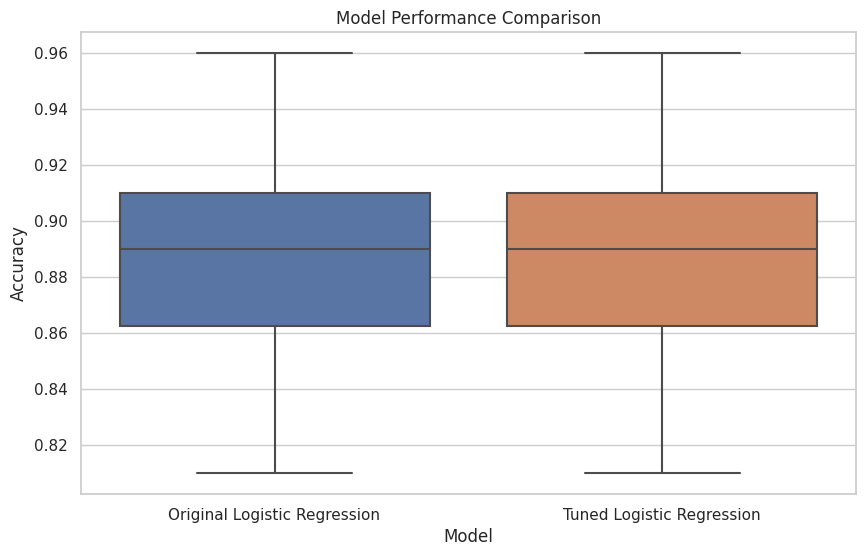

In [87]:
#Create a Boxplot to Compare Models
plt.figure(figsize=(10,6))
sns.boxplot(x='Model', y='Accuracy', data=df_melted)
plt.title('Model Performance Comparison')
plt.show()

In [89]:
#To test whether the improvement in accuracy is statistically significant, I conducted a paired t-test.

from scipy import stats
# Perform a paired t-test
t_stat, p_value = stats.ttest_rel(scores_tuned, scores)

# Check if the improvement is significant at the 95% confidence level
significant = p_value < 0.95

# Output the result
if significant:
    print(f'The improvement is statistically significant with a p-value of {p_value:.3f}.')
else:
    print(f'The improvement is not statistically significant with a p-value of {p_value:.3f}.')

The improvement is not statistically significant with a p-value of 1.000.
